In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, img_as_ubyte 
from skimage.morphology import disk

In [57]:
image = io.imread("../../image copy 3.png")

In [58]:
# Ensure the image is in RGB format
if image.shape[2] == 4:
    image = image[:, :, :3]

In [59]:
# Split the image into RGB channels
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

In [60]:
# Convert channels to uint8 if necessary
red_channel = img_as_ubyte(red_channel)
green_channel = img_as_ubyte(green_channel)
blue_channel = img_as_ubyte(blue_channel)

In [61]:
# Step 2: Calculating Local Entropy
radius = 5  # Neighborhood radius
selem = disk(radius)

In [62]:
entropy_red = filters.rank.entropy(red_channel, selem)
entropy_green = filters.rank.entropy(green_channel, selem)
entropy_blue = filters.rank.entropy(blue_channel, selem)

In [ ]:
tolerance = 0.5
entropy_diff_rg = np.abs(entropy_red - entropy_green)
entropy_diff_rb = np.abs(entropy_red - entropy_blue)
entropy_diff_gb = np.abs(entropy_green - entropy_blue)

In [64]:
mask = (entropy_diff_rg < tolerance) & (entropy_diff_rb < tolerance) & (entropy_diff_gb < tolerance)

In [65]:
# Step 4: Highlighting Matching Pixels
highlighted_image = image.copy()
highlighted_image[mask] = [255, 0, 0]  # Mark matching pixels in red

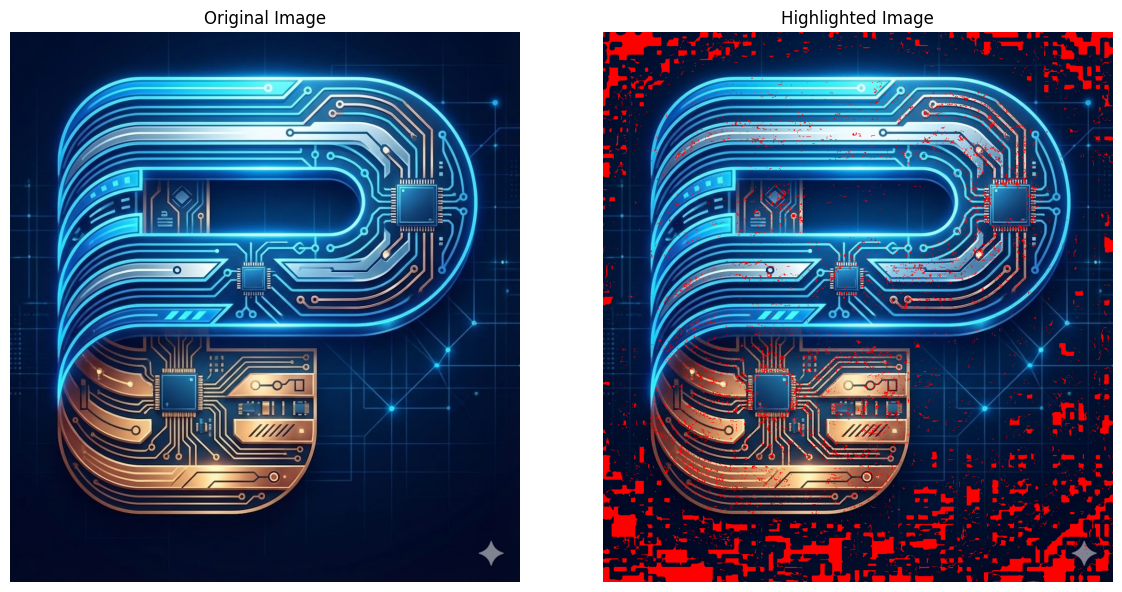

In [66]:
# Display the original and highlighted images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(highlighted_image)
ax[1].set_title('Highlighted Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()

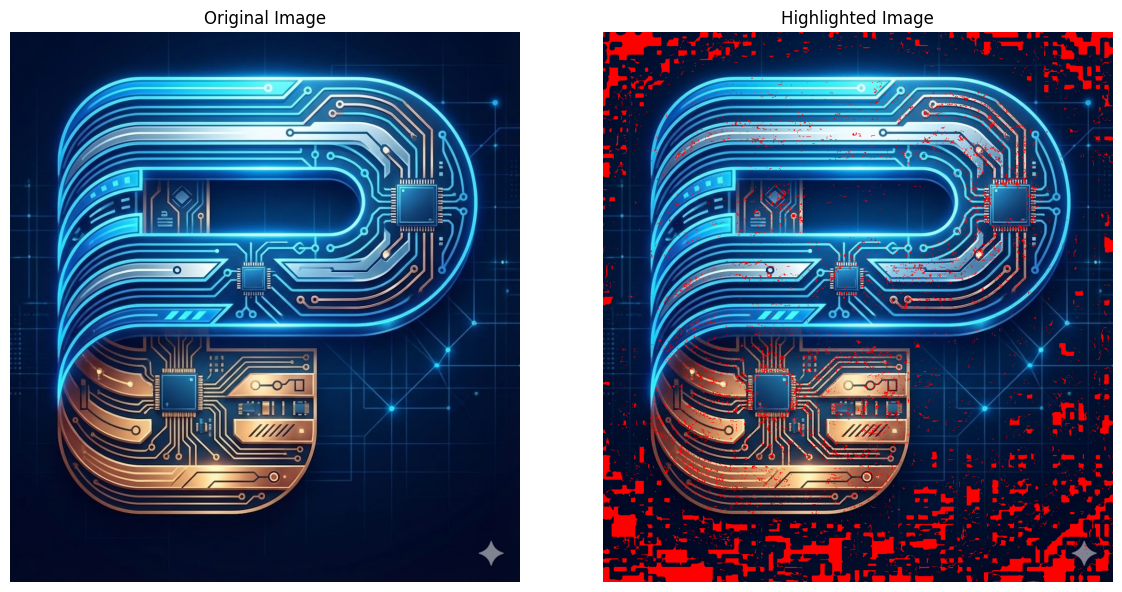

In [67]:
# Display the original and highlighted images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(highlighted_image)
ax[1].set_title('Highlighted Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()